In [312]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=1)
    return tf.Variable(initial)

# dataset

xx1 = np.arange(-50, 50, 1.) # points for first  axis in 2d grid
xx2 = np.arange(-40, 60, 1.) # points for second axis in 2d grid

#xx1 +=  np.random.randint(low=-1,high=1,size=np.shape(xx1))/100  #addative noise to first  axis
#xx2 +=  np.random.randint(low=-1,high=1,size=np.shape(xx1))/100  #addative noise to second axis

xx2 = np.random.permutation(xx2)  #suffle the points on second axis, because distinc arrangment causes infinite solutions
#if the above line is omitted, then any plane that crosses the stright line with the coefficients sums to 2+3 (xx1*2+xx2*3) it a solution.
#this is an important issue when creating the dataset. should point it to the VLSI guy that do it.
xx = np.stack((xx1,xx2),axis=1)

#linear noisy set
yy = xx1 * 2 + xx2 * 3 + 2 + np.random.randint(low=-3,high=3,size=np.shape(xx1))#/10  #measures output + noise

#quadratic noisy set
#yy = np.square(xx1)*0.7+ np.square(xx2)*0.5 + np.multiply(xx1,xx2)*0.2 + xx1 * 2 + xx2 * 3 + 2 #+ np.random.randint(low=-3,high=3,size=np.shape(xx1))#/10  #measures output + noise


In [290]:
# linear model
x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None])
W1 = weight_variable([2, 1])
B1 = weight_variable([1])

y = tf.matmul(x, W1) + B1


# training and cost function
cost_function = tf.reduce_mean(tf.square(tf.squeeze(y) - y_))
train_function = tf.train.AdamOptimizer(1e-1).minimize(cost_function)

# create a session
sess = tf.Session()

# train
sess.run(tf.global_variables_initializer())
for i in range(10000):
    sess.run(train_function, feed_dict={x:xx, y_:yy})
    if i % 1000 == 0:
        print(sess.run(cost_function, feed_dict={x:xx, y_:yy}))
        print(sess.run(W1),sess.run(B1))    

10674.2
[[ 0.45361102]
 [-0.05179206]] [-0.38298061]
2.86863
[[ 1.99812269]
 [ 3.00067067]] [ 1.49822593]
2.86863
[[ 1.99812269]
 [ 3.00067067]] [ 1.49822593]
2.86863
[[ 1.99812269]
 [ 3.00067067]] [ 1.49822485]
2.86863
[[ 1.99812269]
 [ 3.00067091]] [ 1.49822497]
2.86863
[[ 1.99812281]
 [ 3.00067091]] [ 1.49822462]
2.86863
[[ 1.99812269]
 [ 3.00067067]] [ 1.49822426]
2.86863
[[ 1.99812281]
 [ 3.00067091]] [ 1.49822438]
2.86863
[[ 1.99812615]
 [ 3.00067067]] [ 1.49822438]
2.86864
[[ 1.99823928]
 [ 3.0006659 ]] [ 1.49822199]


In [300]:
# quadratic model - note that we try to evaluate a LINEAR FUNCTION !

# note that too many iteration may overfit the noise. so if W2 is not zero, it's :(

# it doesn't work well enough. I mean, there is a low error, but we know that it's not a good solution.
# we want to see W2=0 (non diagonal elements sum to 0), W1 = to the previous example, and also B1.
# so TODO : decaying learning rate 

x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None])
W2 = weight_variable([2, 2])
W1 = weight_variable([2, 1])
B1 = weight_variable([1])


#y = tf.matmul(tf.matmul(x, W2), tf.transpose(x)) + tf.matmul(x, W1) + B1
#y =  tf.matmul(x, W1) + B1
#y = tf.multiply(tf.matmul(x, W2), x) + tf.matmul(x, W1) + B1

y = tf.reduce_sum(tf.multiply(tf.matmul(x, W2), x),axis=1) +  tf.squeeze(tf.transpose(tf.matmul(x, W1)))  + B1

#y can be (None,1) vector or (1,None) vector. Both are ok, and both work. It is highly recommended to check 
#that every addaptive element has the same dim (spent too much time on this already).

# in this case I could have used tf.squeeze, so (mX1) vector + (1Xm) vector won't be summed to a (mXm) matrix 



cost_function = tf.reduce_mean(tf.square(tf.squeeze(y) - y_))
                       
                       
#choose optimizer
        
train_function = tf.train.AdamOptimizer(1e-2).minimize(cost_function)

#train_function = tf.train.GradientDescentOptimizer(0.00000005).minimize(cost_function)
#the learning rate here is SO small bcoz the error is ~1e+6, otherwise it goes to infinity.

# create a session
sess = tf.Session()

# train
sess.run(tf.global_variables_initializer())
for i in range(30000):
    sess.run(train_function, feed_dict={x:xx, y_:yy})
    if i % 2000 == 0:
        print(sess.run(cost_function, feed_dict={x:xx, y_:yy}))
#       print(sess.run(W1),sess.run(B1))
        print(sess.run(W2),sess.run(W1),sess.run(B1))
    
#print(sess.run(W2),sess.run(W1),sess.run(B1))
    

2.89717e+06
[[-0.48933509 -1.49961841]
 [-0.28600267  0.098856  ]] [[-1.09317887]
 [-1.57616806]] [-0.76751441]
4.57339
[[ 0.00094005 -0.60656524]
 [ 0.60705036  0.00077794]] [[ 1.97081351]
 [ 2.99002552]] [-0.50074667]
3.13001
[[  4.51642903e-04  -6.06748462e-01]
 [  6.06867135e-01   3.13233089e-04]] [[ 1.99689627]
 [ 2.9968605 ]] [ 0.58650261]
2.86119
[[  6.78841097e-05  -6.06757224e-01]
 [  6.06858373e-01  -3.76073222e-05]] [[ 1.99689829]
 [ 3.00172591]] [ 1.43314743]
2.85717
[[  1.48767167e-05  -6.06758475e-01]
 [  6.06857121e-01  -8.67093113e-05]] [[ 1.99690008]
 [ 3.0023942 ]] [ 1.54967904]
2.85716
[[  1.49009893e-05  -6.06758475e-01]
 [  6.06857121e-01  -8.60642394e-05]] [[ 1.99689996]
 [ 3.00239706]] [ 1.55004418]
2.85716
[[  1.48953204e-05  -6.06758535e-01]
 [  6.06857121e-01  -8.60512737e-05]] [[ 1.99689996]
 [ 3.00239706]] [ 1.5500443]
2.85722
[[  1.22561269e-05  -6.06756091e-01]
 [  6.06859565e-01  -8.86924972e-05]] [[ 1.99690235]
 [ 3.0023942 ]] [ 1.55004084]
2.85717
[[  1

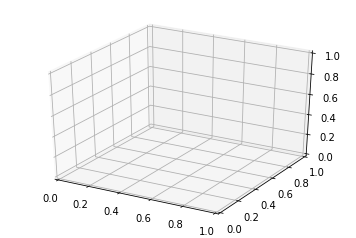

/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


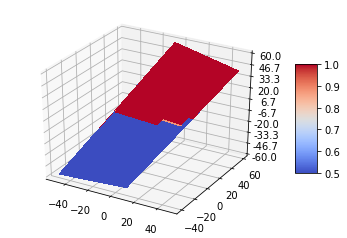

In [316]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

#the mesh is a time consuming operation (for large (>100x100 elements) datasets))

def plot_X_Y(X,Y,Z):
    X, Y = np.meshgrid(X, Y)
    Z = np.array(X*1.8-Y*0.8)
    #Z[(X+Y<2) & (Y-X>-2) & (-X+Y<2) & (Y+X>-2)] = np.nan  
    #Z[(X+Y<2) & (Y-X>-2) & (-X+Y<2) & (Y+X>-2)] = np.nan  # the diagonal slice
    Z[(X<20) & (Y>-20) & (Y<20) & (X>-20)] = np.nan

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, vmin=0.5, vmax=1)
    ax.set_zlim(-60.01, 60.01)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
    
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
X = xx1
Y = xx2
#Z = np.array(X*1.8-Y*0.8)
#Z = yy

#plot some of the dataset that will used as training set.
#the open window will be tested as testing set
plot_X_Y(X,Y,Z)




In [239]:
x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None])
W2 = weight_variable([2, 2])
W1 = weight_variable([2, 1])
B1 = weight_variable([1])

print(x.get_shape())
print(y_.get_shape())

print('\n')

new_y=tf.reduce_sum(tf.multiply(tf.matmul(x, W2), x)) + tf.matmul(x, W1) + B1
print(new_y.get_shape())
print(tf.matmul(x, W1).get_shape())

print('\n')

print(W1.get_shape())
print(W2.get_shape())
print(B1.get_shape())


(?, 2)
(?,)


(?, 1)
(?, 1)


(2, 1)
(2, 2)
(1,)


In [280]:
xx1 = np.arange(1, 4, 1) # points for first  axis in 2d grid
xx2 = np.arange(11, 14, 1) # points for second axis in 2d grid


xx2 = np.random.permutation(xx2)  #suffle the points on second axis, because distinc arrangment causes infinite solutions
#if the above line is omitted, then any plane that crosses the stright line with the coefficients sums to 2+3 (xx1*2+xx2*3) it a solution.
#this is an important issue when creating the dataset. should point it to the VLSI guy that do it.
xx = np.stack((xx1,xx2),axis=1)

#linear noisy set
yy =  np.square(xx1)*0.5 + np.square(xx2)*0.5

print(xx1)
print(xx2)
print(yy)



x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None])
  
W2 = tf.Variable(tf.constant([[0.5, 0.],[0., 0.5]]))
  
W1 = tf.Variable(tf.constant([[0.5],[0.5]]))


lin=tf.matmul(x, W1)
#lin=tf.squeeze(tf.transpose(lin))

y = tf.reduce_sum(tf.multiply(tf.matmul(x, W2), x),axis=1)
y=tf.transpose(y)

sess=tf.Session()
sess.run(tf.global_variables_initializer())


print(sess.run(y, feed_dict={x:xx, y_:yy}))

print(sess.run(lin, feed_dict={x:xx, y_:yy}))


[1 2 3]
[13 11 12]
[ 85.   62.5  76.5]
[ 85.   62.5  76.5]
[[ 7. ]
 [ 6.5]
 [ 7.5]]
